#**NHÓM 7**
| STT |Họ và tên            | Description |Role|
| ----| --------------------|------------ |----|
| 1   | Nguyễn Quốc Cường   | 1852|Leader|
| 2   | Nguyễn Trung Hiếu   | 1852|Member|
| 3   | Võ Linh Bảo         | 18520503|Member|

#**KHÓA SỐ (0.15s, 100MB)**

Để tăng độ an toàn chống hiện tượng cướp ngân hàng ngày càng phổ biến người ta dùng khóa số với mã mở khóa đơn giản nhưng rất hiệu quả. Trên cửa ra vào hiển thị một xâu khá dài các ký tự số. Các chữ số có thể di chuyển đổi chổ cho nhau hoặc bị xóa. Muốn mở khóa người ta phải di chuyển các chữ số và trong trường hợp cần thiết – xóa vài chữ số để nhận được xâu lớn nhất thỏa mãn điều kiện đã cài đặt. Điều kiện này được thay đổi thường xuyên. Hôm nay điều kiện đó là “Số nhận được phải chia hết cho $3$. Số nhận được có thể bắt đầu bằng các chữ số 0. Xâu “$000$” sẽ lớn hơn xâu “$00$”.

**Hãy xác định khóa mở cửa.**

> **Dữ liệu**: Vào từ thiết bị nhập chuẩn gồm một xâu ký tự số có độ dài lớn hơn $2$ và không vượt quá $10^5$.

> **Kết quả**: Đưa ra thiết bị xuất chuẩn xâu khóa mở cửa.

> **Ví dụ:**


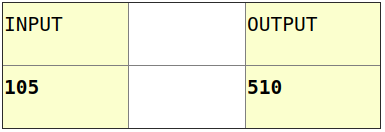

# Abstraction:
Tìm cách xóa 1 số ký tự (có thể không xóa) và hoán vị các ký tự còn lại từ 1 xâu ký tự số sao cho xâu kết quả có tổng các ký tự chia hết cho 3 và xâu có giá trị lớn nhất

# Pattern recognition:
- Bài toán có đầu vào là 1 xâu  
$\rightarrow$ dạng bài xử lý chuỗi
- Yêu cầu tìm cách để tổng chữ số chia hết cho 3  
$\rightarrow$ dạng bài số học


# Algorithm design:
## 